In [1]:
import pandas_datareader as pdr

In [2]:
from datetime import datetime

# There is a python library called pandas_datareader. We can get finance data using functions in this lib easily.

In [3]:
symbol = 'AAPL'
start= datetime(2018,3,7)
end = datetime.now()

In [4]:
AAPL = pdr.get_data_yahoo(symbol,start,end)

In [5]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-06,178.250000,176.130005,177.910004,176.669998,23788500.0,174.020172
2018-03-07,175.850006,174.270004,174.940002,175.029999,31703500.0,172.404770
2018-03-08,177.119995,175.070007,175.479996,176.940002,23774100.0,174.286118
2018-03-09,180.000000,177.389999,177.960007,179.979996,32185200.0,177.280518
2018-03-12,182.389999,180.210007,180.289993,181.720001,32207100.0,178.994415


In [6]:
AAPL = AAPL.iloc[len(AAPL)-1::-1]
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-07,174.440002,172.020004,173.869995,172.500000,24760900.0,172.500000
2019-03-06,175.490005,173.940002,174.669998,174.520004,20810400.0,174.520004
2019-03-05,176.000000,174.539993,175.940002,175.529999,19737400.0,175.529999
2019-03-04,177.750000,173.970001,175.690002,175.850006,27436200.0,175.850006
2019-03-01,175.149994,172.889999,174.279999,174.970001,25886200.0,174.970001


In [7]:
help(pdr.get_data_yahoo)

Help on function get_data_yahoo in module pandas_datareader.data:

get_data_yahoo(*args, **kwargs)



In [8]:
(77.9-0.217)/77.9

0.997214377406932

# Example 3.4: Calculating Sharpe Ratio for Long-Only Versus Market-Neutral Strategies

* long-only strategy
* annualized risk free rate is 4%
* buy at the closing time of Nov 26,2001 and sell at Nov 14,2007

In [9]:
symbol = 'IGE'
start = datetime(2001,11,26)
end = datetime(2007,11,14)
IGE = pdr.get_data_yahoo(symbol,start,end)
IGE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-11-26,15.16833,15.16833,15.16833,15.16833,0.0,11.689160
2001-11-27,15.16833,15.16833,15.16833,15.16833,0.0,11.689160
2001-11-28,15.16833,15.16833,15.16833,15.16833,0.0,11.689160
2001-11-29,15.16833,15.16833,15.16833,15.16833,0.0,11.689160
2001-11-30,15.22000,15.22000,15.22000,15.22000,600.0,11.728977


In [10]:
daily_r = (IGE['Adj Close']-IGE['Adj Close'].shift(1))/IGE['Adj Close'].shift(1)

In [11]:
daily_r[:5]

Date
2001-11-26         NaN
2001-11-27    0.000000
2001-11-28    0.000000
2001-11-29    0.000000
2001-11-30    0.003406
Name: Adj Close, dtype: float64

In [12]:
IGE['daily return']= daily_r
IGE = IGE.iloc[1:,]

In [13]:
IGE.head()

,High,Low,Open,Close,Volume,Adj Close,daily return
Date,,,,,,,
2001-11-27,15.16833,15.16833,15.16833,15.16833,0.0,11.689160,0.000000
2001-11-28,15.16833,15.16833,15.16833,15.16833,0.0,11.689160,0.000000
2001-11-29,15.16833,15.16833,15.16833,15.16833,0.0,11.689160,0.000000
2001-11-30,15.22000,15.22000,15.22000,15.22000,600.0,11.728977,0.003406
2001-12-03,15.22000,15.22000,15.22000,15.22000,0.0,11.728977,0.000000


In [14]:
import numpy as np

In [15]:
sharpe_ratio = (IGE['daily return'].mean()- 0.04/252)/IGE['daily return'].std()* np.sqrt(252)
sharpe_ratio

0.7886055241885757

Now let’s calculate the Sharpe ratio of a long-short market-neutral strategy. In fact, it is a very trivial twist of the buy-and-hold 
strategy above: at the time we bought IGE, let’s suppose we just shorted an equal dollar amount of Standard & Poor’s depositary 
receipts (SPY) as a hedge, and closed both positions at the same time in November 2007

In [16]:
symbo = 'SPY'
spy = pdr.get_data_yahoo(symbo,start,end)

In [17]:
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-11-26,116.339996,115.070000,115.750000,115.930000,13726000.0,82.822075
2001-11-27,116.900002,114.089996,115.620003,115.430000,19261400.0,82.464890
2001-11-28,115.169998,113.250000,114.739998,113.339996,20195500.0,80.971771
2001-11-29,114.919998,113.000000,113.660004,114.870003,16354700.0,82.064789
2001-11-30,114.910004,114.019997,114.400002,114.050003,13680300.0,81.478951


In [18]:
(len(spy) == len(IGE)) # remember that we deleted one row from IGE

False

In [19]:
len(spy)- len(IGE) == 1

True

In [20]:
daily_r = (spy['Adj Close']-spy['Adj Close'].shift(1))/spy['Adj Close'].shift(1)
spy['daily return']= daily_r
spy = spy.iloc[1:,]
spy.head()

,High,Low,Open,Close,Volume,Adj Close,daily return
Date,,,,,,,
2001-11-27,116.900002,114.089996,115.620003,115.430000,19261400.0,82.464890,-0.004313
2001-11-28,115.169998,113.250000,114.739998,113.339996,20195500.0,80.971771,-0.018106
2001-11-29,114.919998,113.000000,113.660004,114.870003,16354700.0,82.064789,0.013499
2001-11-30,114.910004,114.019997,114.400002,114.050003,13680300.0,81.478951,-0.007139
2001-12-03,114.080002,113.010002,113.650002,113.370003,15220400.0,80.993187,-0.005962


In [21]:
total_daily_return = (IGE['daily return']-spy['daily return'])/2
Sharpe_ratio_neutral = total_daily_return.mean()/total_daily_return.std()*np.sqrt(252)
Sharpe_ratio_neutral

0.774073470616207

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

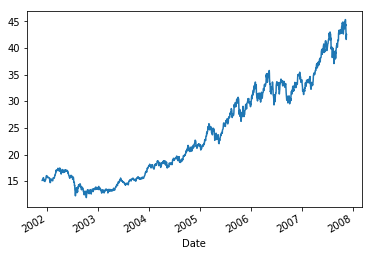

In [23]:
IGE['Close'].plot() #plot IGE stock price

# Example 3.6: Pair Trading of GLD and GDX
* GLD versus GDX is a good candidate for pair trading because GLD
reflects the spot price of gold, and GDX is a basket of gold-mining
stocks. It makes intuitive sense that their prices should move in tandem.
* the pair trading algorithm works like this: find two instruments with strong correlation, then use liear regression to find the hedge_ratio $\beta$ between them, compute the spread of the two using this $\beta$, and finding trading signals by setting s threshold on the spread
* we will use the most recent data

In [24]:
symbol = 'GLD'
start = datetime(2017,3,7)
end = datetime.now()

In [25]:
gld = pdr.get_data_yahoo(symbol,start,end)
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,117.349998,116.629997,117.349998,116.720001,4883500,116.720001
2017-03-07,116.250000,115.620003,116.129997,115.779999,6846300,115.779999
2017-03-08,115.360001,114.949997,114.989998,115.059998,7620900,115.059998
2017-03-09,115.029999,114.410004,114.779999,114.470001,6410900,114.470001
2017-03-10,114.730003,114.129997,114.449997,114.720001,7929500,114.720001


In [26]:
symbol = 'GDX'
gdx = pdr.get_data_yahoo(symbol,start,end)
gdx.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,22.120001,21.350000,22.100000,21.639999,75805800.0,21.353817
2017-03-07,21.799999,21.219999,21.379999,21.510000,49198800.0,21.225536
2017-03-08,21.639999,21.170000,21.230000,21.350000,47354800.0,21.067654
2017-03-09,21.549999,21.139999,21.389999,21.139999,36909000.0,20.860430
2017-03-10,21.889999,21.190001,21.320000,21.730000,82724800.0,21.442627


In [27]:
np.corrcoef(gld['Adj Close'],gdx['Adj Close'])

array([[1.       , 0.7567263],
       [0.7567263, 1.       ]])

 the correlation is about 0.757. this implies this two instruments indeed is strongly correlated

In [28]:
gld.rename(columns = {'Adj Close': "gld"},inplace = True)
gld.head()

,High,Low,Open,Close,Volume,gld
Date,,,,,,
2017-03-06,117.349998,116.629997,117.349998,116.720001,4883500,116.720001
2017-03-07,116.250000,115.620003,116.129997,115.779999,6846300,115.779999
2017-03-08,115.360001,114.949997,114.989998,115.059998,7620900,115.059998
2017-03-09,115.029999,114.410004,114.779999,114.470001,6410900,114.470001
2017-03-10,114.730003,114.129997,114.449997,114.720001,7929500,114.720001


In [29]:
gdx.rename(columns = {'Adj Close': "gdx"},inplace = True)
gdx.head()

,High,Low,Open,Close,Volume,gdx
Date,,,,,,
2017-03-06,22.120001,21.350000,22.100000,21.639999,75805800.0,21.353817
2017-03-07,21.799999,21.219999,21.379999,21.510000,49198800.0,21.225536
2017-03-08,21.639999,21.170000,21.230000,21.350000,47354800.0,21.067654
2017-03-09,21.549999,21.139999,21.389999,21.139999,36909000.0,20.860430
2017-03-10,21.889999,21.190001,21.320000,21.730000,82724800.0,21.442627


In [30]:
import pandas as pd
df= pd.DataFrame({'gld': gld['gld'],'gdx':gdx['gdx']},index = gld.index)
df.head()

,gld,gdx
Date,,
2017-03-06,116.720001,21.353817
2017-03-07,115.779999,21.225536
2017-03-08,115.059998,21.067654
2017-03-09,114.470001,20.860430
2017-03-10,114.720001,21.442627


In [31]:
t = datetime(2018,3,6)
X_train = df[df.index<t]['gld']
y_train=df[df.index<t]['gdx']
X_train[:5]

Date
2017-03-06    116.720001
2017-03-07    115.779999
2017-03-08    115.059998
2017-03-09    114.470001
2017-03-10    114.720001
Name: gld, dtype: float64

In [32]:
X_test = df[df.index>=t]['gld']
y_test=df[df.index>=t]['gdx']
X_test[:5]

Date
2018-03-06    126.529999
2018-03-07    125.720001
2018-03-08    125.419998
2018-03-09    125.540001
2018-03-12    125.540001
Name: gld, dtype: float64

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
b,a = lr.intercept_,lr.coef_

* $y = 0.171*x + 1.806$

In [36]:
spread_train = y_train.values - a*X_train.values -b

In [42]:
m,s=spread_train.mean(),spread_train.std()
m,s

(1.931435611093923e-15, 0.6616189885735292)

In [38]:
spread_train[0,0:10]

array([-0.41151852, -0.37905569, -0.41381584, -0.52014844,  0.01929794,
        0.28230835, -0.26294038,  0.99113219,  0.70182807,  0.55869149])

In [39]:
spread_train = pd.Series(spread_train[0],index = X_train.index)

In [40]:
spread_train[:5]

Date
2017-03-06   -0.411519
2017-03-07   -0.379056
2017-03-08   -0.413816
2017-03-09   -0.520148
2017-03-10    0.019298
dtype: float64

first we try signals that long ro short in 2 std and quit in 1 std

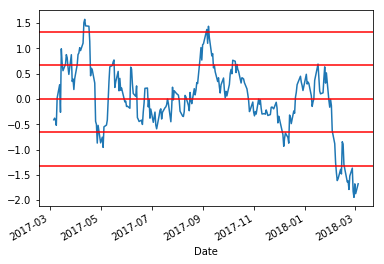

In [46]:
spread_train.plot()
plt.axhline(y=2*s,color='r',linestyle='-')
plt.axhline(y=s,color='r',linestyle='-')
plt.axhline(y=0,color='r',linestyle='-')
plt.axhline(y=-s,color='r',linestyle='-')
plt.axhline(y=-2*s,color='r',linestyle='-')

it looks like in the train set this strategy is profitable at least from the plotting

In [47]:
spread_test = y_test.values - a*X_test.values - b

In [49]:
spread_test = pd.Series(spread_test[0],index = X_test.index)

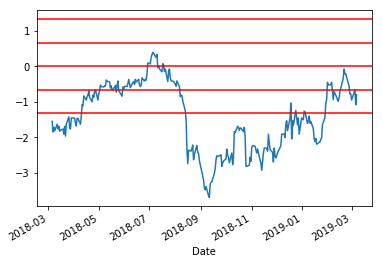

In [50]:
spread_test.plot()
plt.axhline(y=2*s,color='r',linestyle='-')
plt.axhline(y=s,color='r',linestyle='-')
plt.axhline(y=0,color='r',linestyle='-')
plt.axhline(y=-s,color='r',linestyle='-')
plt.axhline(y=-2*s,color='r',linestyle='-')

but it will not perform well in the test set, instead it looks like that the average moved downwards. And we will suffer from a long period of loss. But maybe we can try a moving avarage method. 

# This part is my experiment of paring trading strategy.
* observations, normal pair trading strategy won't perform well. this can be seen from the plotting.
* but from the plotting of the test set, if we use a moving average strategy, this will be profitble (at least looks like).
* this is not data snooping, become to test this strategy, we can do some paper trading to see whether it is profitable or not.

Ideal and algorithms:
    * use the the most recent one year data to find trading signal everyday. for example, on March 8,2019, 
    we will use data from March 8,2018 to March 7,2019. fitting linear regression to this one years data, 
    then compute mean and standatd deviation.

In [111]:
from datetime import timedelta
def pairing_trading_signal(end, back=timedelta(365)):
    symbol1 = 'GLD'
    symbol2 = 'GDX'
    start = end - back
    gld = pdr.get_data_yahoo(symbol1,start,end)['Adj Close']
    gdx = pdr.get_data_yahoo(symbol2,start,end)['Adj Close']
    lr = LinearRegression()
    lr.fit(gld.values[:-2].reshape(-1,1),gdx.values[:-2].reshape(-1,1))
    a,b = lr.coef_,lr.intercept_
    residual = gdx.values - a*gld.values - b
    m , s = residual.mean(), residual.std()
    spread = gdx.values[-1] - a*gld.values[-1] - b
    return a[0,0],b[0],m,s,spread[0][0]

In [112]:
t= datetime.now()

In [113]:
pairing_trading_signal(datetime(2018,3,5))

(0.1761337791301253,
 1.1969977684150237,
 -0.014344800867715161,
 0.6605180806132154,
 -1.7093715898184492)

* this coincides with our previous computation, so our function is correct
* now let us plot the moving avarage and std to see intuitively whether our strategy works

In [117]:
def plot_moving_average_std(start,end):
    index = pd.date_range(start,end,freq = 'B')
    m = []
    s = []
    spread = []
    for d in index:
        a,b,l,k,t = pairing_trading_signal(d)
        m.append(l)
        s.append(k)
        spread.append(t)
    df = pd.DataFrame({'mean':m,'std':s,"spread":spread},index = index)
    s1 = df['std'].apply(lambda x: 0.8*x)
    s_1 = df['std'].apply(lambda x: -0.8*x)
    s_2 = df['std'].apply(lambda x: -0.4*x)
    s2 = df['std'].apply(lambda x: 0.4*x)
    df['mean'].plot()
    df['spread'].plot()
    s1.plot()
    s2.plot()
    s_1.plot()
    s_2.plot()
    return
        

# this algorithm takes a lot of times to run, we can speed it to pre-load a plong period of data

Wall time: 4min 2s


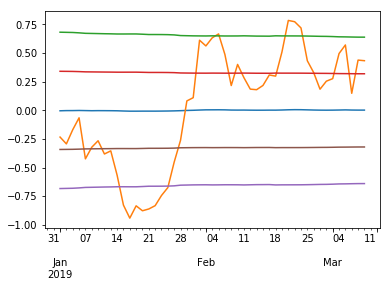

In [118]:
%%time
plot_moving_average_std('2019-01-01','2019-03-08')

our trading strategy is chosen like this:
        * if the spread is big than 0.8 * std, then we hold a position of -[1,-a]/(1-a) (gdx,gld), and we will hold [0,0] when 
        spread is below 0.4 std
        * if the spread if less than -0.8 * std, then we hold a position of [1,-a]/(1-a) (gdx,gld), and we will hold [0,0] when 
        spread is above -0.4 std
        * so we always hold a [0,0] position when spread is between -0.4 std and 0.4 std
next we will backtest our strategy and compute the Sharpe Ratio

In [352]:
start = datetime(2017,3,7)
end = datetime(2019,3,7)
symbol1 = 'GLD'
symbol2 = 'GDX'
u = 0.8
v= 0.4

In [353]:
gld = pdr.get_data_yahoo(symbol1,start - timedelta(365),end)['Adj Close']
gdx = pdr.get_data_yahoo(symbol2,start - timedelta(365),end)['Adj Close']

In [354]:
index = gld[start:].index
index[:10]

DatetimeIndex(['2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
               '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16',
               '2017-03-17', '2017-03-20'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [355]:
gld[index[380]-timedelta(365)]

128.1300048828125

In [356]:
position = pd.DataFrame(np.zeros((len(index),3)),index = index, columns = ['gdx','gld','indicator'])
d= index[0]
X = gld[d-timedelta(365):d]
y = gdx[d-timedelta(365):d]
lr =LinearRegression()
lr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
a,b = lr.coef_,lr.intercept_
residual = y.values - a*X.values - b
m , s = residual.mean(), residual.std()
spread = gdx[d] - a*gld[d] - b
a=a[0,0]

In [357]:
a,b

(0.480386777877393, array([-33.72746259]))

In [358]:
if spread >= u*s:
    position.loc[d,]= [-1/(1-a),a/(1-a),1]  
elif spread <= -u*s :
    position.loc[d,]= [1/(1-a),-a/(1-a),-1] 
else:
    position.loc[d,]=[0,0,0]

In [359]:
position.loc[d]

gdx          0.0
gld          0.0
indicator    0.0
Name: 2017-03-07 00:00:00, dtype: float64

In [360]:
for i in range(1,len(index)):
    d= index[i]
    X = gld[d-timedelta(365):d]
    y = gdx[d-timedelta(365):d]
    lr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
    a,b = lr.coef_,lr.intercept_
    residual = y.values - a*X.values - b
    m , s = residual.mean(), residual.std()
    spread = gdx[d] - a*gld[d] - b
    a=a[0,0]
    if spread >= u*s or (spread > v*s and position.loc[index[i-1],'indicator']==1):
        position.loc[d,]= [-1/(1-a),a/(1-a),1]  
    elif spread <= -u*s or (spread < -v*s and position.loc[index[i-1],'indicator']==-1):
        position.loc[d,]= [1/(1-a),-a/(1-a),-1] 
    else:
        position.loc[d,]=[0,0,0]

In [361]:
position.head()

,gdx,gld,indicator
Date,,,
2017-03-07,0.0,0.0,0.0
2017-03-08,0.0,0.0,0.0
2017-03-09,0.0,0.0,0.0
2017-03-10,0.0,0.0,0.0
2017-03-13,0.0,0.0,0.0


In [362]:
gld = gld[datetime(2017,3,6):]
gdx = gdx[datetime(2017,3,6):]

In [363]:
r1 = (gld-gld.shift(1))/gld.shift(1)
r2 = (gdx-gdx.shift(1))/gdx.shift(1)

In [364]:
r1.dropna(inplace = True)

In [365]:
r2.dropna(inplace=True)

In [366]:
r2.head()

Date
2017-03-07   -0.006007
2017-03-08   -0.007438
2017-03-09   -0.009836
2017-03-10    0.027909
2017-03-13    0.012425
Name: Adj Close, dtype: float64

In [368]:
total_return = position['gld']*r1 + position['gdx']*r2

In [369]:
total_return.dropna(inplace= True)

In [376]:
total_return.head()

Date
2017-03-07   -0.0
2017-03-08   -0.0
2017-03-09   -0.0
2017-03-10    0.0
2017-03-13    0.0
dtype: float64

In [372]:
sharpe_ratio = np.sqrt(252)*total_return.mean()/total_return.std()

In [373]:
sharpe_ratio

-0.3048046619425297

In [374]:
252*total_return.mean()

-0.07685293815320825

In [375]:
total_return

Date
2017-03-07   -0.000000
2017-03-08   -0.000000
2017-03-09   -0.000000
2017-03-10    0.000000
2017-03-13    0.000000
2017-03-14   -0.000000
2017-03-15    0.000000
2017-03-16    0.000000
2017-03-17    0.000000
2017-03-20    0.000000
2017-03-21    0.000000
2017-03-22    0.000000
2017-03-23   -0.000000
2017-03-24    0.000000
2017-03-27    0.000000
2017-03-28   -0.046839
2017-03-29    0.006150
2017-03-30   -0.023414
2017-03-31    0.020027
2017-04-03    0.027647
2017-04-04    0.018394
2017-04-05    0.002417
2017-04-06    0.005670
2017-04-07   -0.002874
2017-04-10    0.011992
2017-04-11    0.043672
2017-04-12    0.010176
2017-04-13   -0.006456
2017-04-17   -0.002779
2017-04-18   -0.019398
                ...   
2019-01-24    0.001224
2019-01-25    0.039745
2019-01-28    0.000000
2019-01-29    0.000000
2019-01-30    0.000000
2019-01-31    0.000000
2019-02-01   -0.000000
2019-02-04   -0.000000
2019-02-05   -0.006285
2019-02-06    0.020871
2019-02-07    0.000000
2019-02-08    0.000000
2019-0

### this alporithm doesn't work